<a href="https://colab.research.google.com/github/osm1315/tableau/blob/main/DArt_B_titanic_escape_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 TITANIC에서 살아남기

안녕하세요 DArt-B 여러분, 2024-2 정규학기 첫번째 과제는 titanic과 함께 시작하게 되었습니다.
각 팀마다 홀수 혹은 짝수 문항을 분배받아 다른 학회원 분과 함께 질문에 답을 해 나가게 되었습니다.

파이썬이 익숙하지 않거나 머신러닝 경험이 적은 분들을 위해 baseline 코드를 제공합니다.
본 코드가 가장 이상적이라고 말씀드릴 수 없습니다. 그러나 이 코드 자체로 결과물을 도출할 수 있으니, 코드 자체에 어려움을 겪기보다는 조금이라도 개인적으로 사고하고 판단하는 데에 힘을 쏟으시길 바라겠습니다.

본 코드는 코랩 작동을 기반으로 짜여진 코드입니다.

## connection to google account

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/drive/MyDrive/titanic/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

## 데이터 파악

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- gender:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [ ]:
ori_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ori_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#행과 열 크기 확인
print(ori_train.shape)
print(ori_test.shape)

(891, 12)
(418, 11)


In [ ]:
print(ori_train.columns) #Survived 존재
print(ori_test.columns) #Survived 없음

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(ori_train.isnull().sum())
print('---------')
print(ori_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# train 파일

In [ ]:
ori_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 6. 피처 선택

In [ ]:
input_train = ori_train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

### 분포 확인

In [ ]:
input_train.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
input_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# 변수 타입
data_types = input_train.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['Sex', 'Embarked']

양적 변수: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
target_cols = quant_vari
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

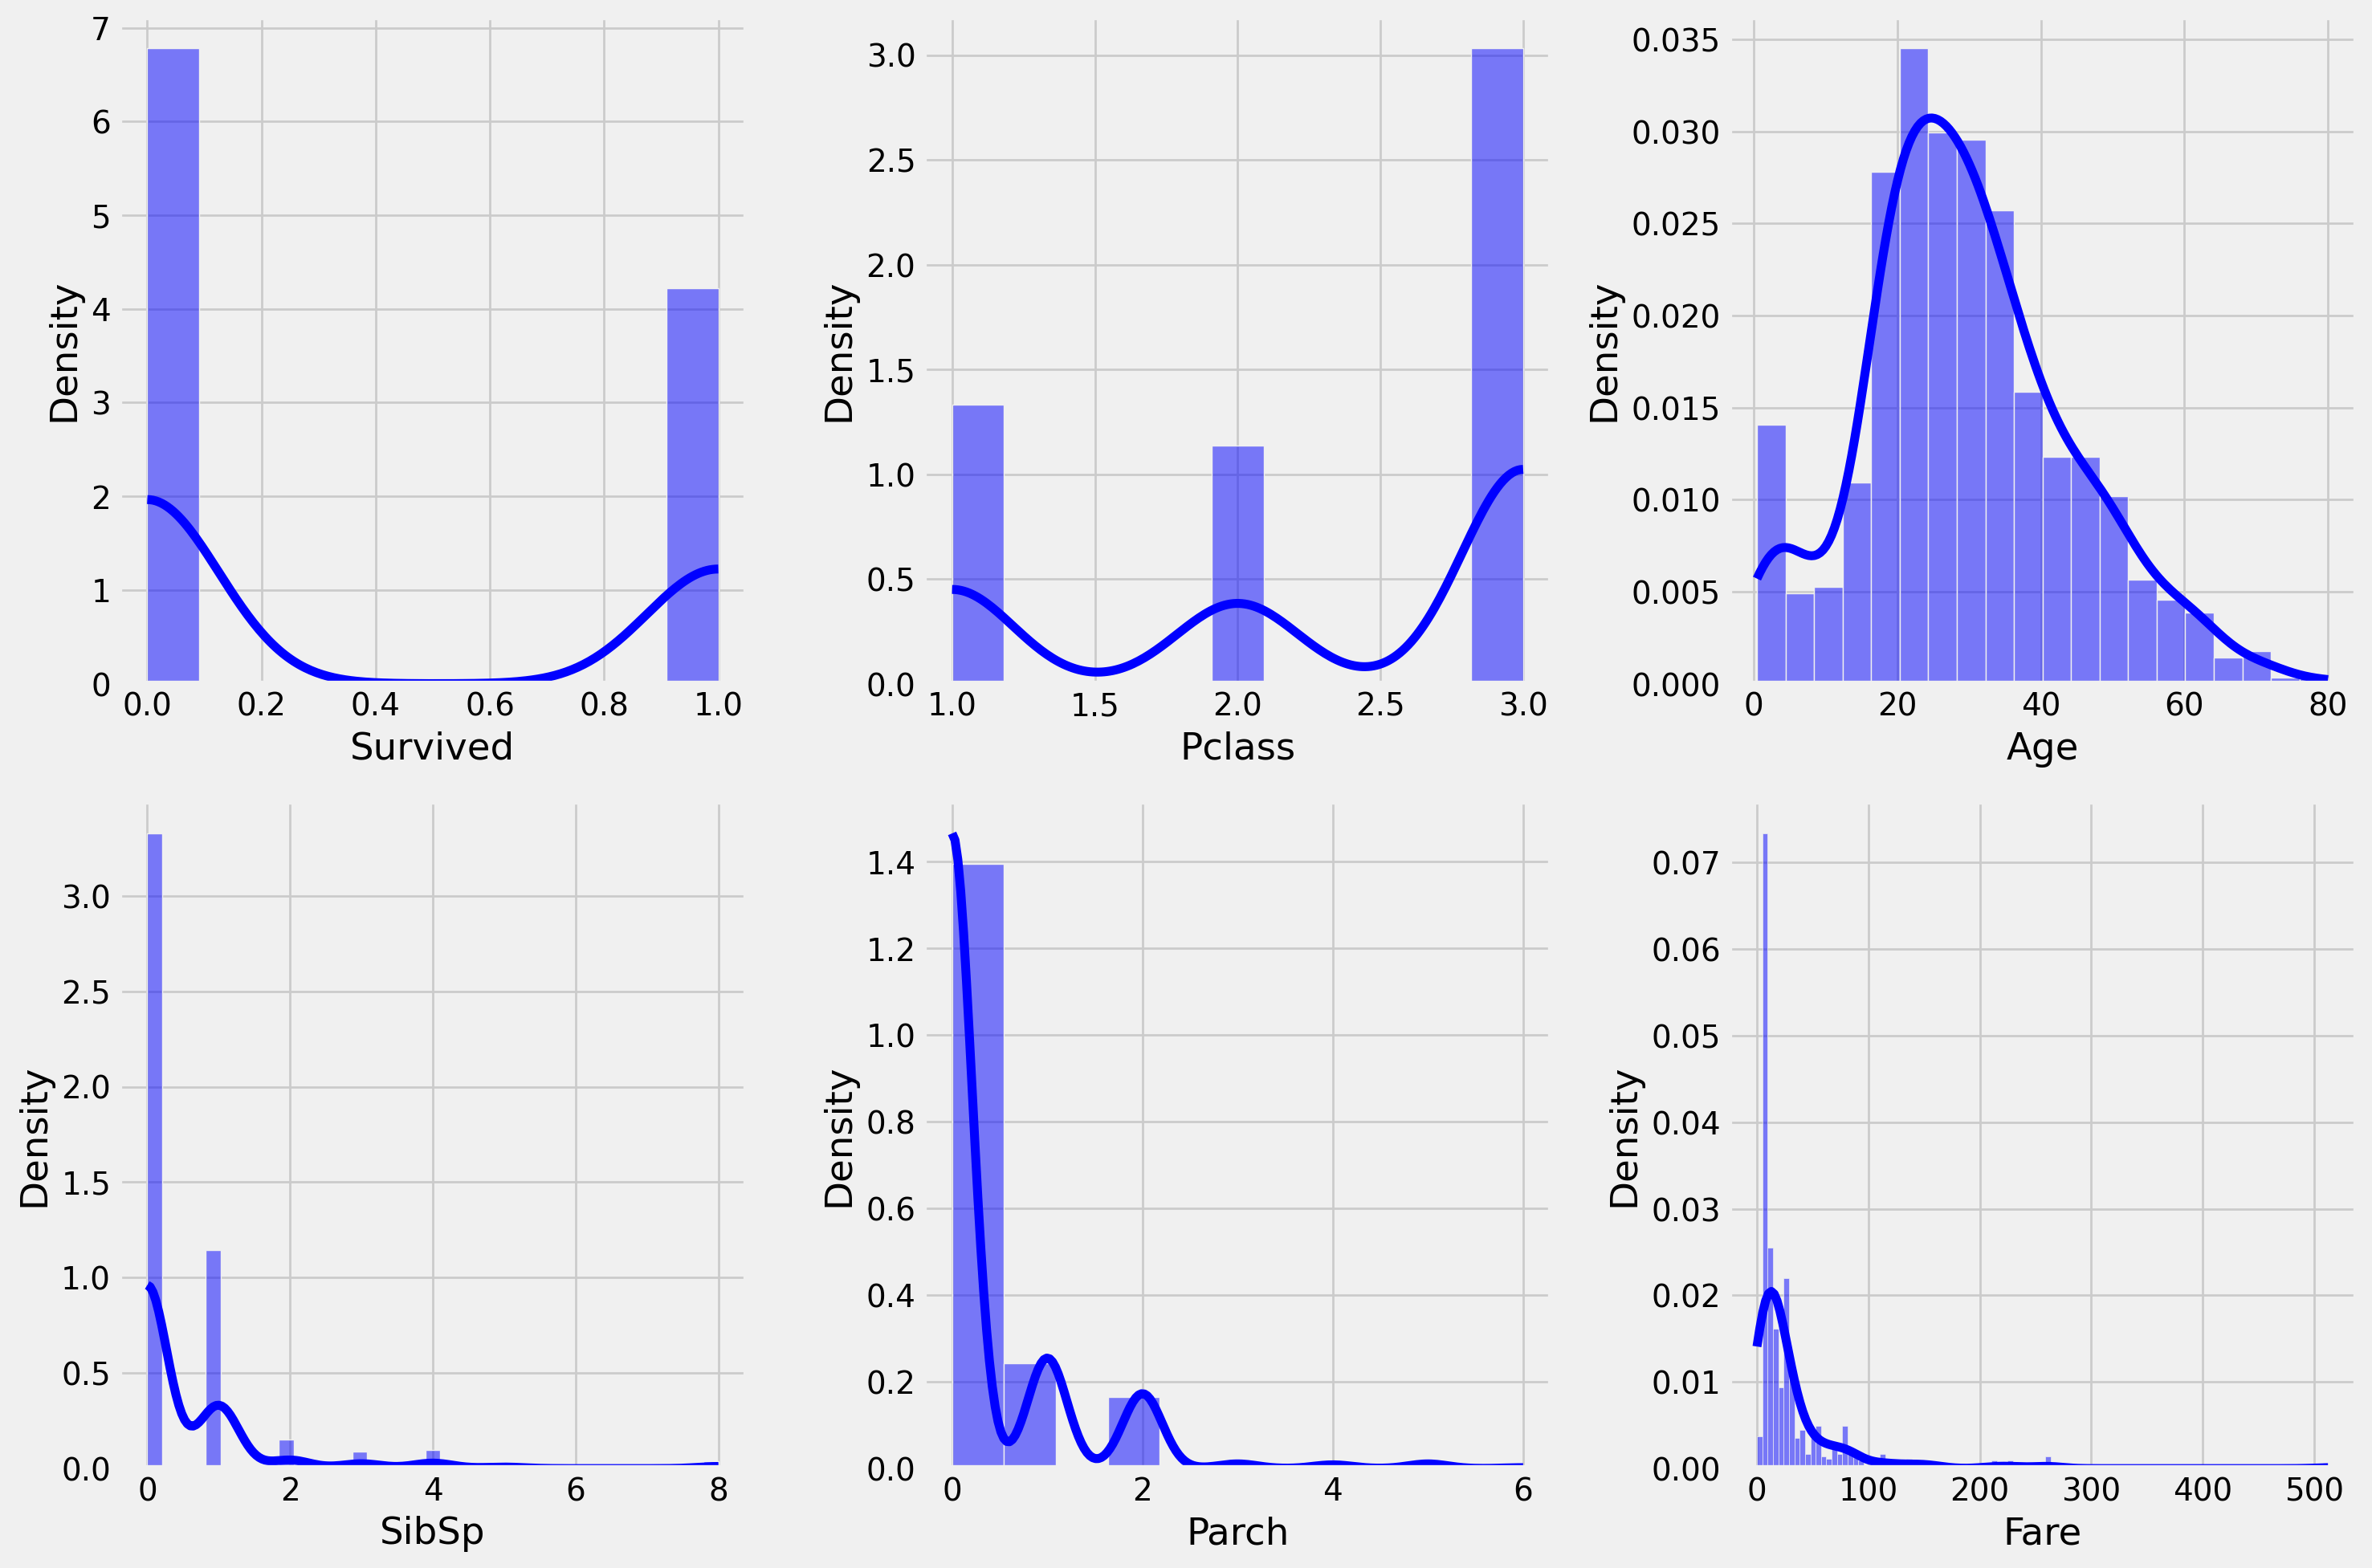

In [ ]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(input_train[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
for col in qual_vari:
    print(input_train[col].value_counts())
    print()

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



## 1. 결측치 처리

In [ ]:
input_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


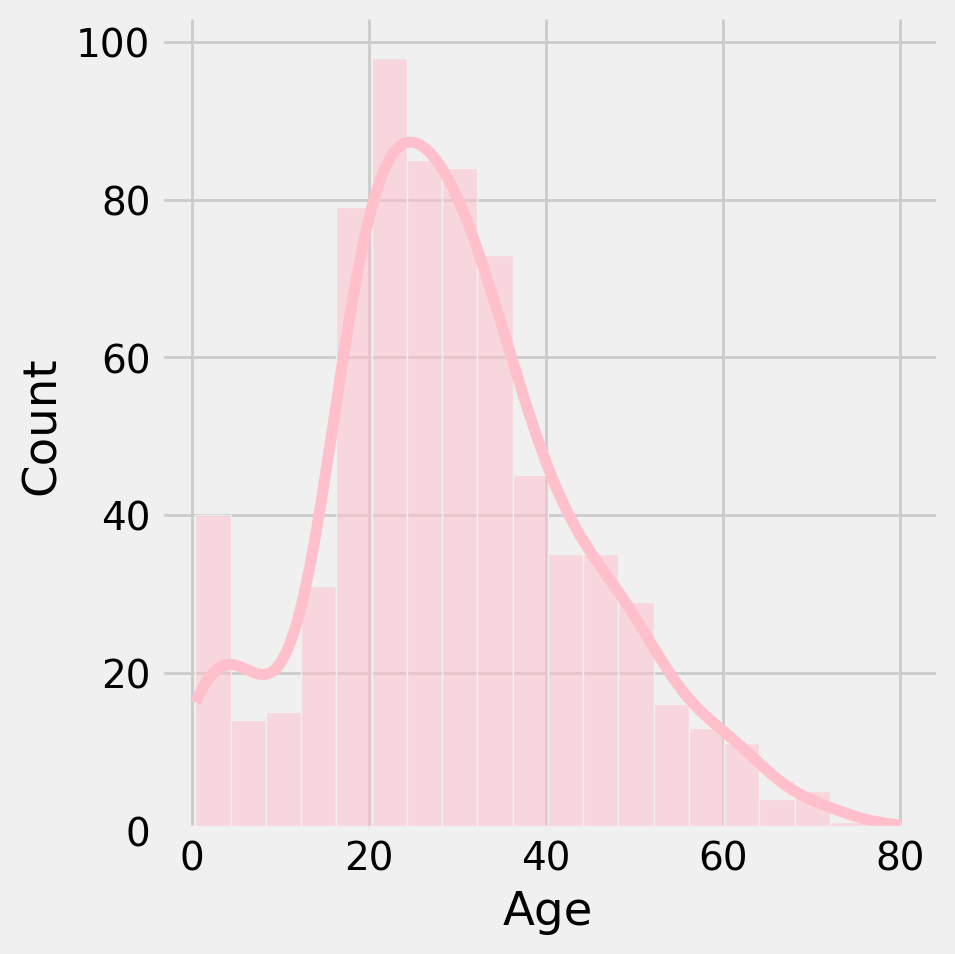

In [ ]:
#Mean or Median?
#데이터 분포를 확인해 결정하기!
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

데이터 분포가 정규분포의 모양에서 크게 벗어나 왜곡되거나 쏠리지는 않았습니다.

In [ ]:
print(input_train['Age'].mean())
print(input_train['Age'].median())

29.69911764705882
28.0


실제로 거의 비슷하네요. median을 선택하겠습니다.

In [ ]:
input_train['Age'].fillna(input_train['Age'].median(), inplace=True)

In [ ]:
input_train['Embarked'].fillna(input_train['Embarked'].mode()[0], inplace=True)

Embarked는 범주형 변수이므로 Mode(최빈값)으로 결측치를 보완했습니다.

## 5. 이상치 처리

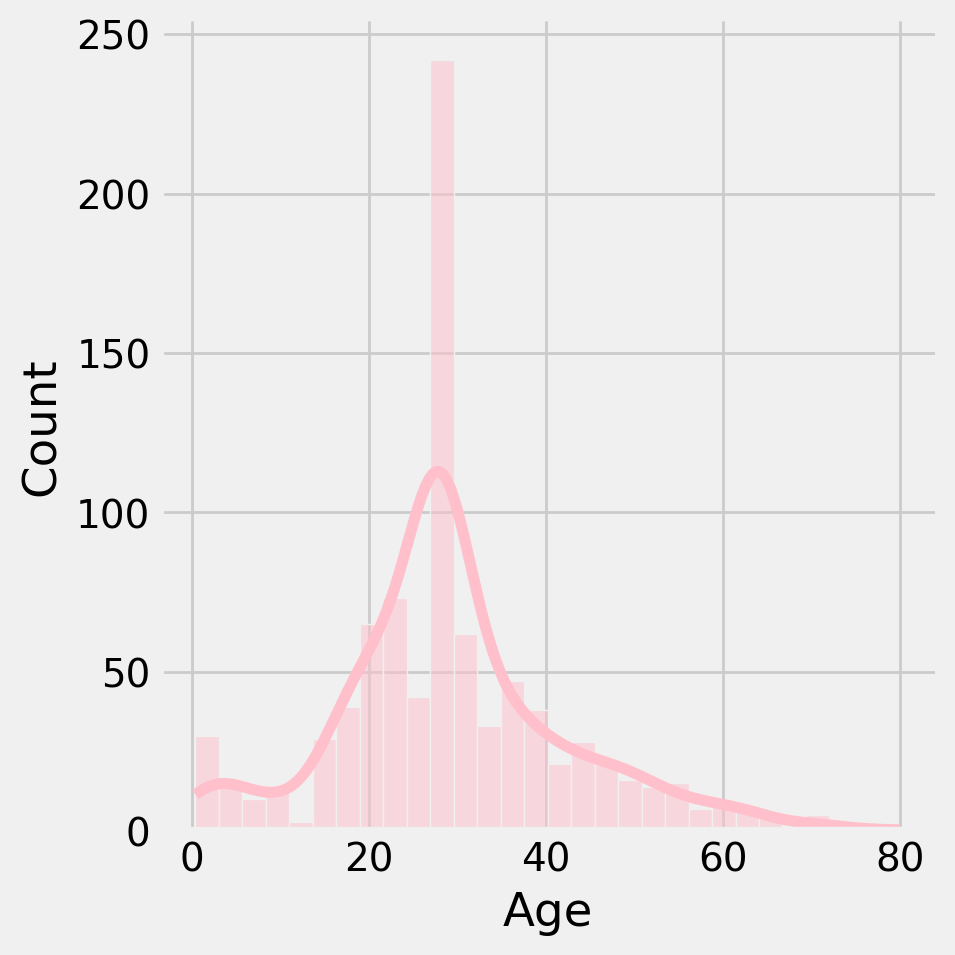

In [ ]:
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

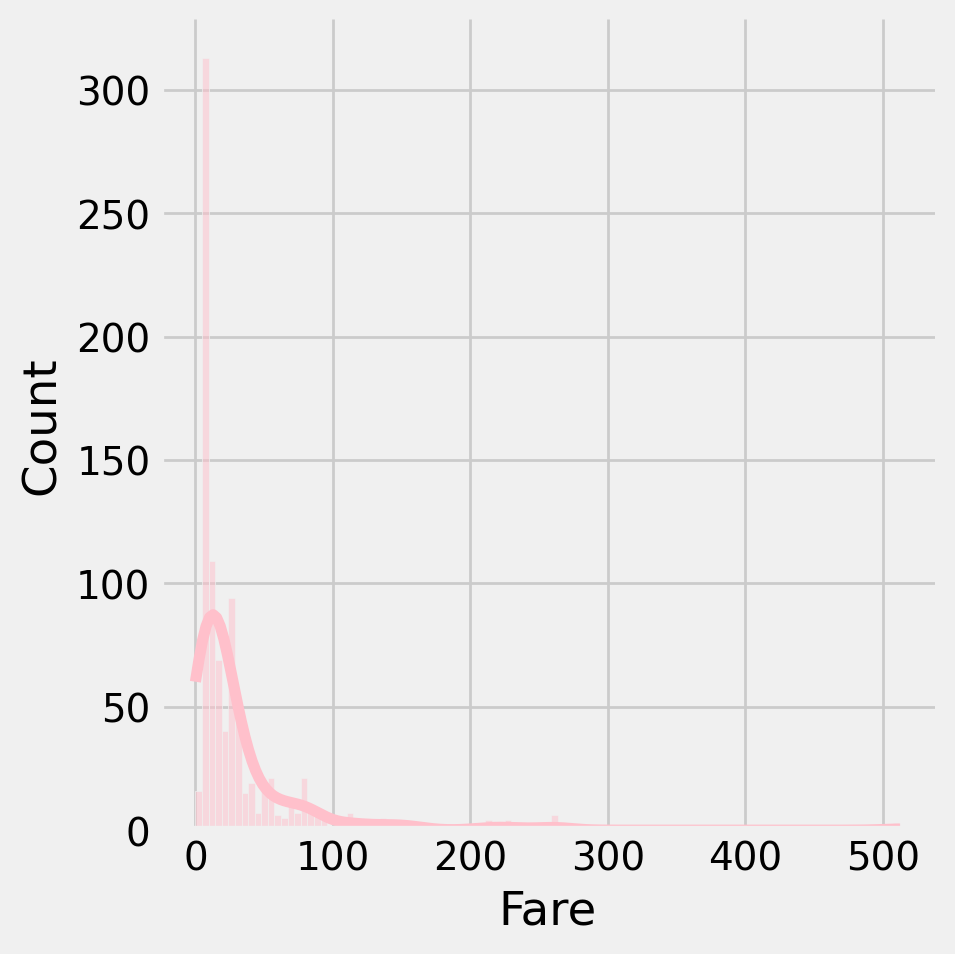

In [ ]:
sns.displot(input_train['Fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

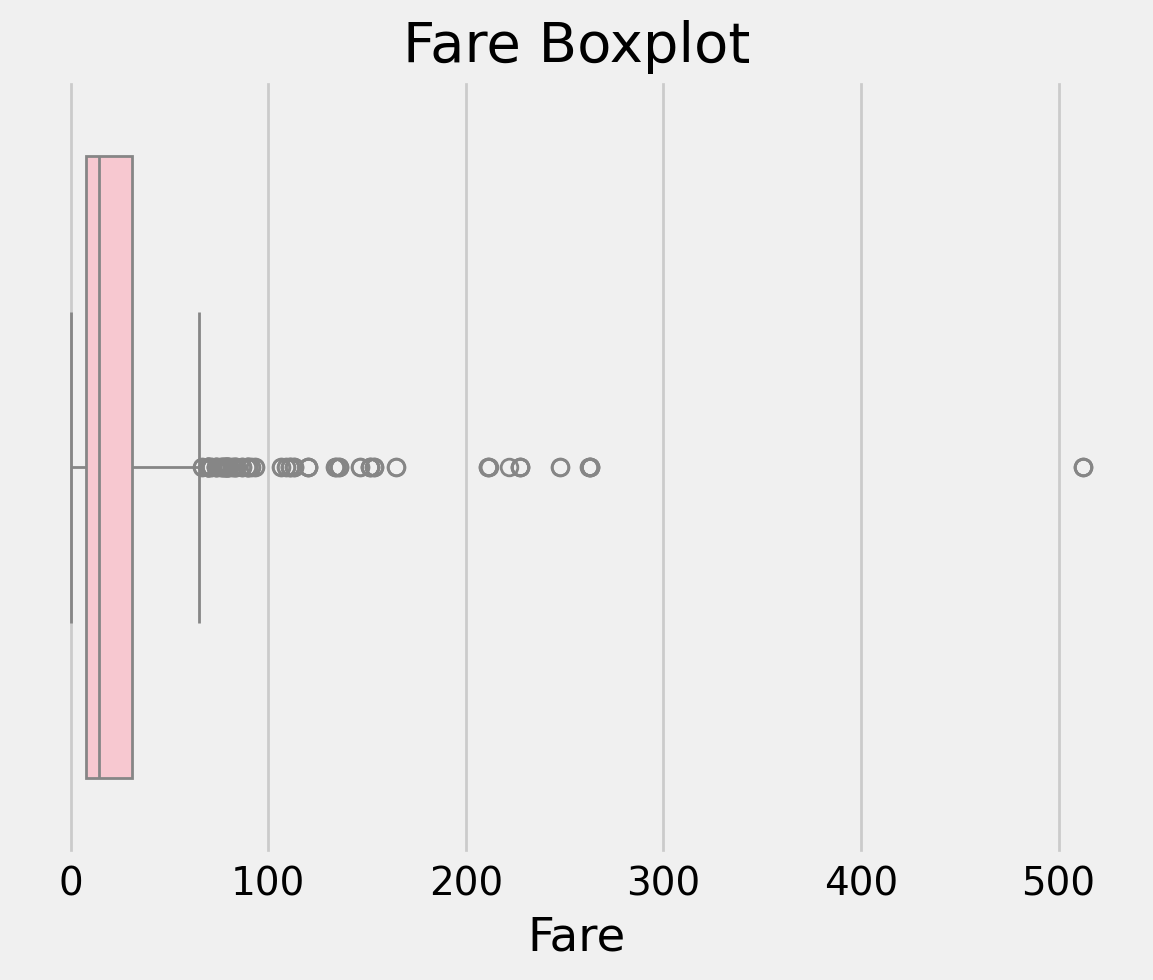

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(input_train, 'Fare')

sns.boxplot(x=input_train['Fare'], color='pink')
plt.title('Fare Boxplot')
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(input_train['Age'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = input_train[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
96          0       1  male  71.0      0      0  34.6542        C
116         0       3  male  70.5      0      0   7.7500        Q
493         0       1  male  71.0      0      0  49.5042        C
630         1       1  male  80.0      0      0  30.0000        S
672         0       2  male  70.0      0      0  10.5000        S
745         0       1  male  70.0      1      1  71.0000        S
851         0       3  male  74.0      0      0   7.7750        S


In [ ]:
input_train = input_train[abs_z_scores <= age_threshold]

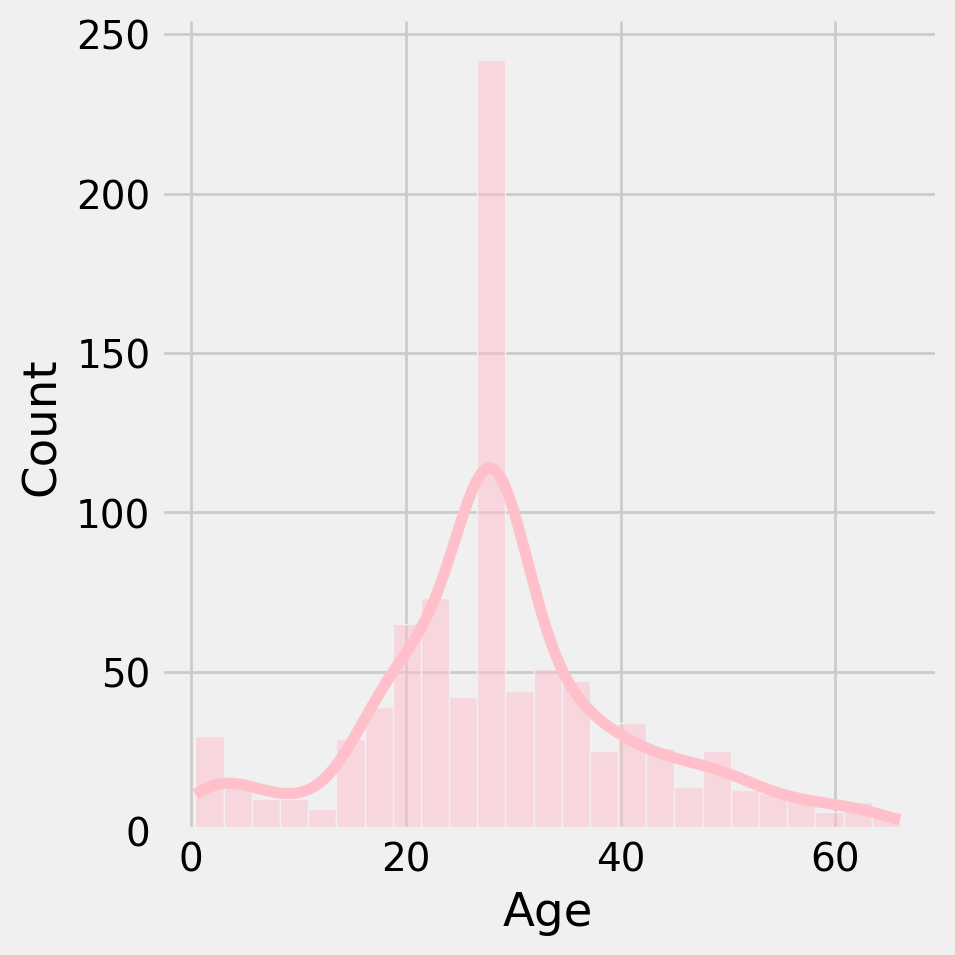

In [ ]:
#이상치 처리 후 모습
sns.displot(input_train['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

## 2. 인코딩

In [ ]:
# 원-핫 인코딩
input_processed = pd.get_dummies(input_train, columns=['Sex', 'Embarked'], drop_first=True)
input_processed.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
# SibSp와 Parch 컬럼을 0과 0이 아닌 값으로 인코딩
input_processed['Have_SibSp'] = input_processed['SibSp'].apply(lambda x: False if x == 0 else True)
input_processed['Have_ParCh'] = input_processed['Parch'].apply(lambda x: False if x == 0 else True)

input_processed.drop(columns=['SibSp','Parch'], inplace=True)

# 결과 출력
input_processed.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Have_SibSp,Have_ParCh
0,0,3,22.0,7.2500,True,False,True,True,False
1,1,1,38.0,71.2833,False,False,False,True,False
2,1,3,26.0,7.9250,False,False,True,False,False
3,1,1,35.0,53.1000,False,False,True,True,False
4,0,3,35.0,8.0500,True,False,True,False,False


## 3. 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
input_scaled = input_processed.copy()

# 연속형 변수만 스케일링
input_scaled[['Age', 'Fare']] = scaler.fit_transform(input_scaled[['Age', 'Fare']])

## 4. 왜도 처리

In [ ]:
# 변환 방법 리스트
transformations = {
    'log': np.log1p,
    'sqrt': np.sqrt,
    'boxcox': lambda x: stats.boxcox(x + 1)[0]  # boxcox 변환은 0 초과과의 값이어야 하므로 1을 더해줌
}

In [ ]:
def Skewness(df, cols):
    best_transformation = {}

    for column in cols:
        print(f"컬럼 '{column}'의 변환 및 왜도 측정 결과:")
        original_data = df[column].values

        # 왜도 확인
        original_skew = stats.skew(original_data)
        print(f"원본 데이터: 왜도 = {original_skew:.4f}")
        best_skew = original_skew
        best_method = 'original'

        for method, transform in transformations.items():
            try:
                transformed_data = transform(original_data)
                skew = stats.skew(transformed_data)
                print(f"{method} 변환: 왜도 = {skew:.4f}")
                if np.abs(skew) < np.abs(best_skew):
                    best_skew = skew
                    best_method = method
            except ValueError as e:
                print(f"{method} 변환 실패: {e}")

        best_transformation[column] = best_method
        print(f"가장 적절한 변환 방법: {best_method}\n")

    print("각 컬럼의 최적 변환 방법:", best_transformation)

In [ ]:
Skewness(input_scaled, ['Age','Fare'])

컬럼 'Age'의 변환 및 왜도 측정 결과:
원본 데이터: 왜도 = 0.3337
log 변환: 왜도 = -0.1770
sqrt 변환: 왜도 = -0.9583
boxcox 변환: 왜도 = 0.0093
가장 적절한 변환 방법: boxcox

컬럼 'Fare'의 변환 및 왜도 측정 결과:
원본 데이터: 왜도 = 4.7706
log 변환: 왜도 = 3.6984
sqrt 변환: 왜도 = 2.0859
boxcox 변환: 왜도 = 0.6651
가장 적절한 변환 방법: boxcox

각 컬럼의 최적 변환 방법: {'Age': 'boxcox', 'Fare': 'boxcox'}


In [ ]:
# Box-Cox 변환 함수 정의
boxcox_transform = lambda x: stats.boxcox(x + 1)[0]

# 변환을 적용할 데이터 컬럼
input_scaled['Fare'] = boxcox_transform(input_scaled['Fare'])

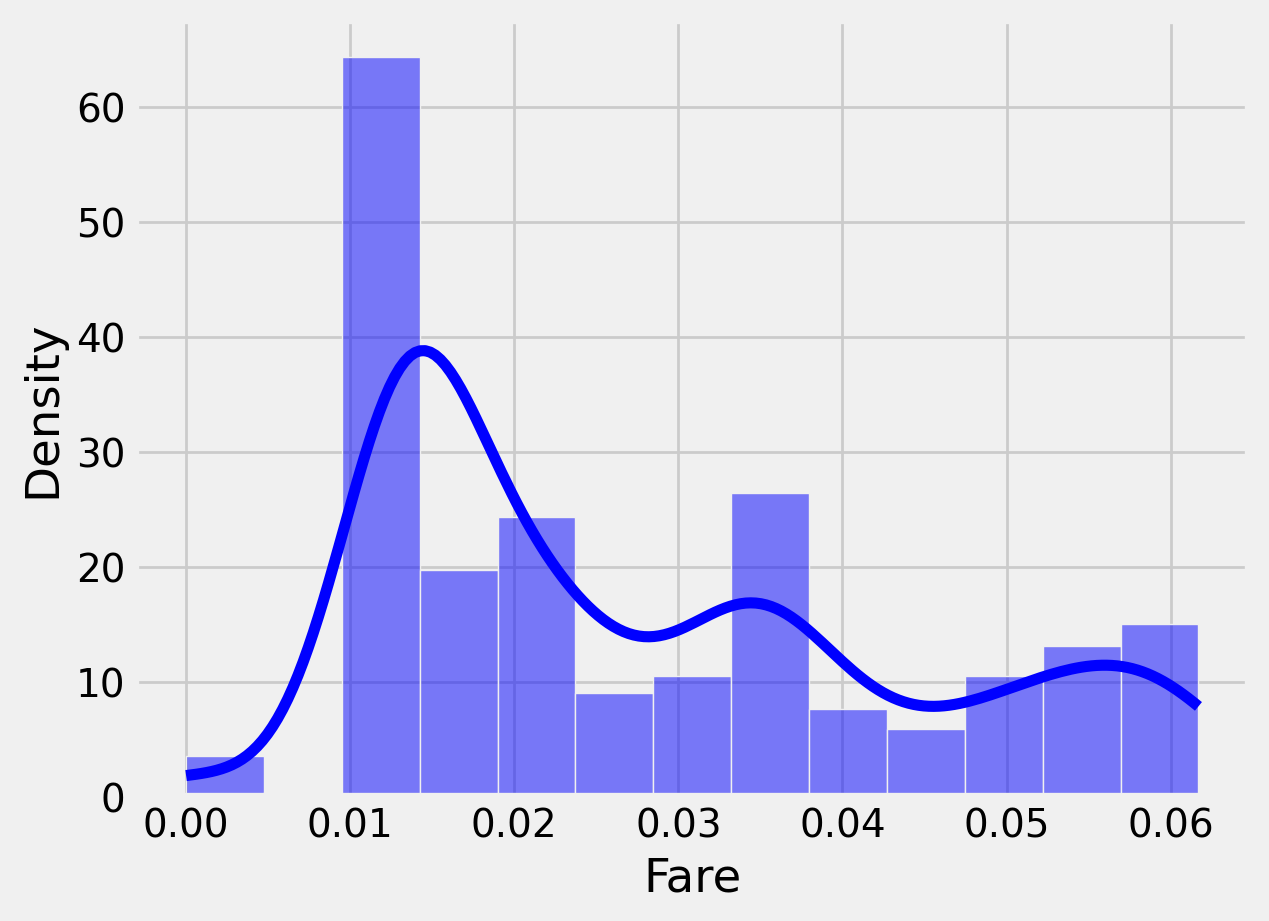

In [ ]:
sns.histplot(input_scaled['Fare'], color='blue', kde=True, label='Negative', stat='density', alpha=0.5)
plt.show()

## 6. 피처 선택 re

## 다중 공선성

In [ ]:
vif_test = input_scaled.copy()

In [ ]:
vif_test.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Have_SibSp,Have_ParCh
0,0,3,0.329064,0.012567,True,False,True,True,False
1,1,1,0.573041,0.054227,False,False,False,True,False
2,1,3,0.390058,0.013590,False,False,True,False,False
3,1,1,0.527295,0.049220,False,False,True,True,False
4,0,3,0.527295,0.013777,True,False,True,False,False


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = vif_test
X = sm.add_constant(X)

X = X.astype(float)  # dummy 결과로 boolean 값을 가짐 -> float으로 변환

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  81.731317
1    Survived   1.637781
2      Pclass   3.014947
3         Age   1.271150
4        Fare   3.431094
5    Sex_male   1.523387
6  Embarked_Q   1.490512
7  Embarked_S   1.439591
8  Have_SibSp   1.469210
9  Have_ParCh   1.520332


다중공선성은 띠지 않는 것으로 결과가 나왔습니다. (보통 5 이상을 유의하게 판단)

## 7. 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X = input_processed.drop('Survived', axis=1)  # 'Survived'를 제외한 모든 feature
y = input_processed['Survived']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. 모델 유형 선택

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9. 모델 평가 지표 선택

In [ ]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8158

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       158
           1       0.79      0.75      0.77       108

    accuracy                           0.82       266
   macro avg       0.81      0.81      0.81       266
weighted avg       0.81      0.82      0.82       266


Confusion Matrix:
[[136  22]
 [ 27  81]]


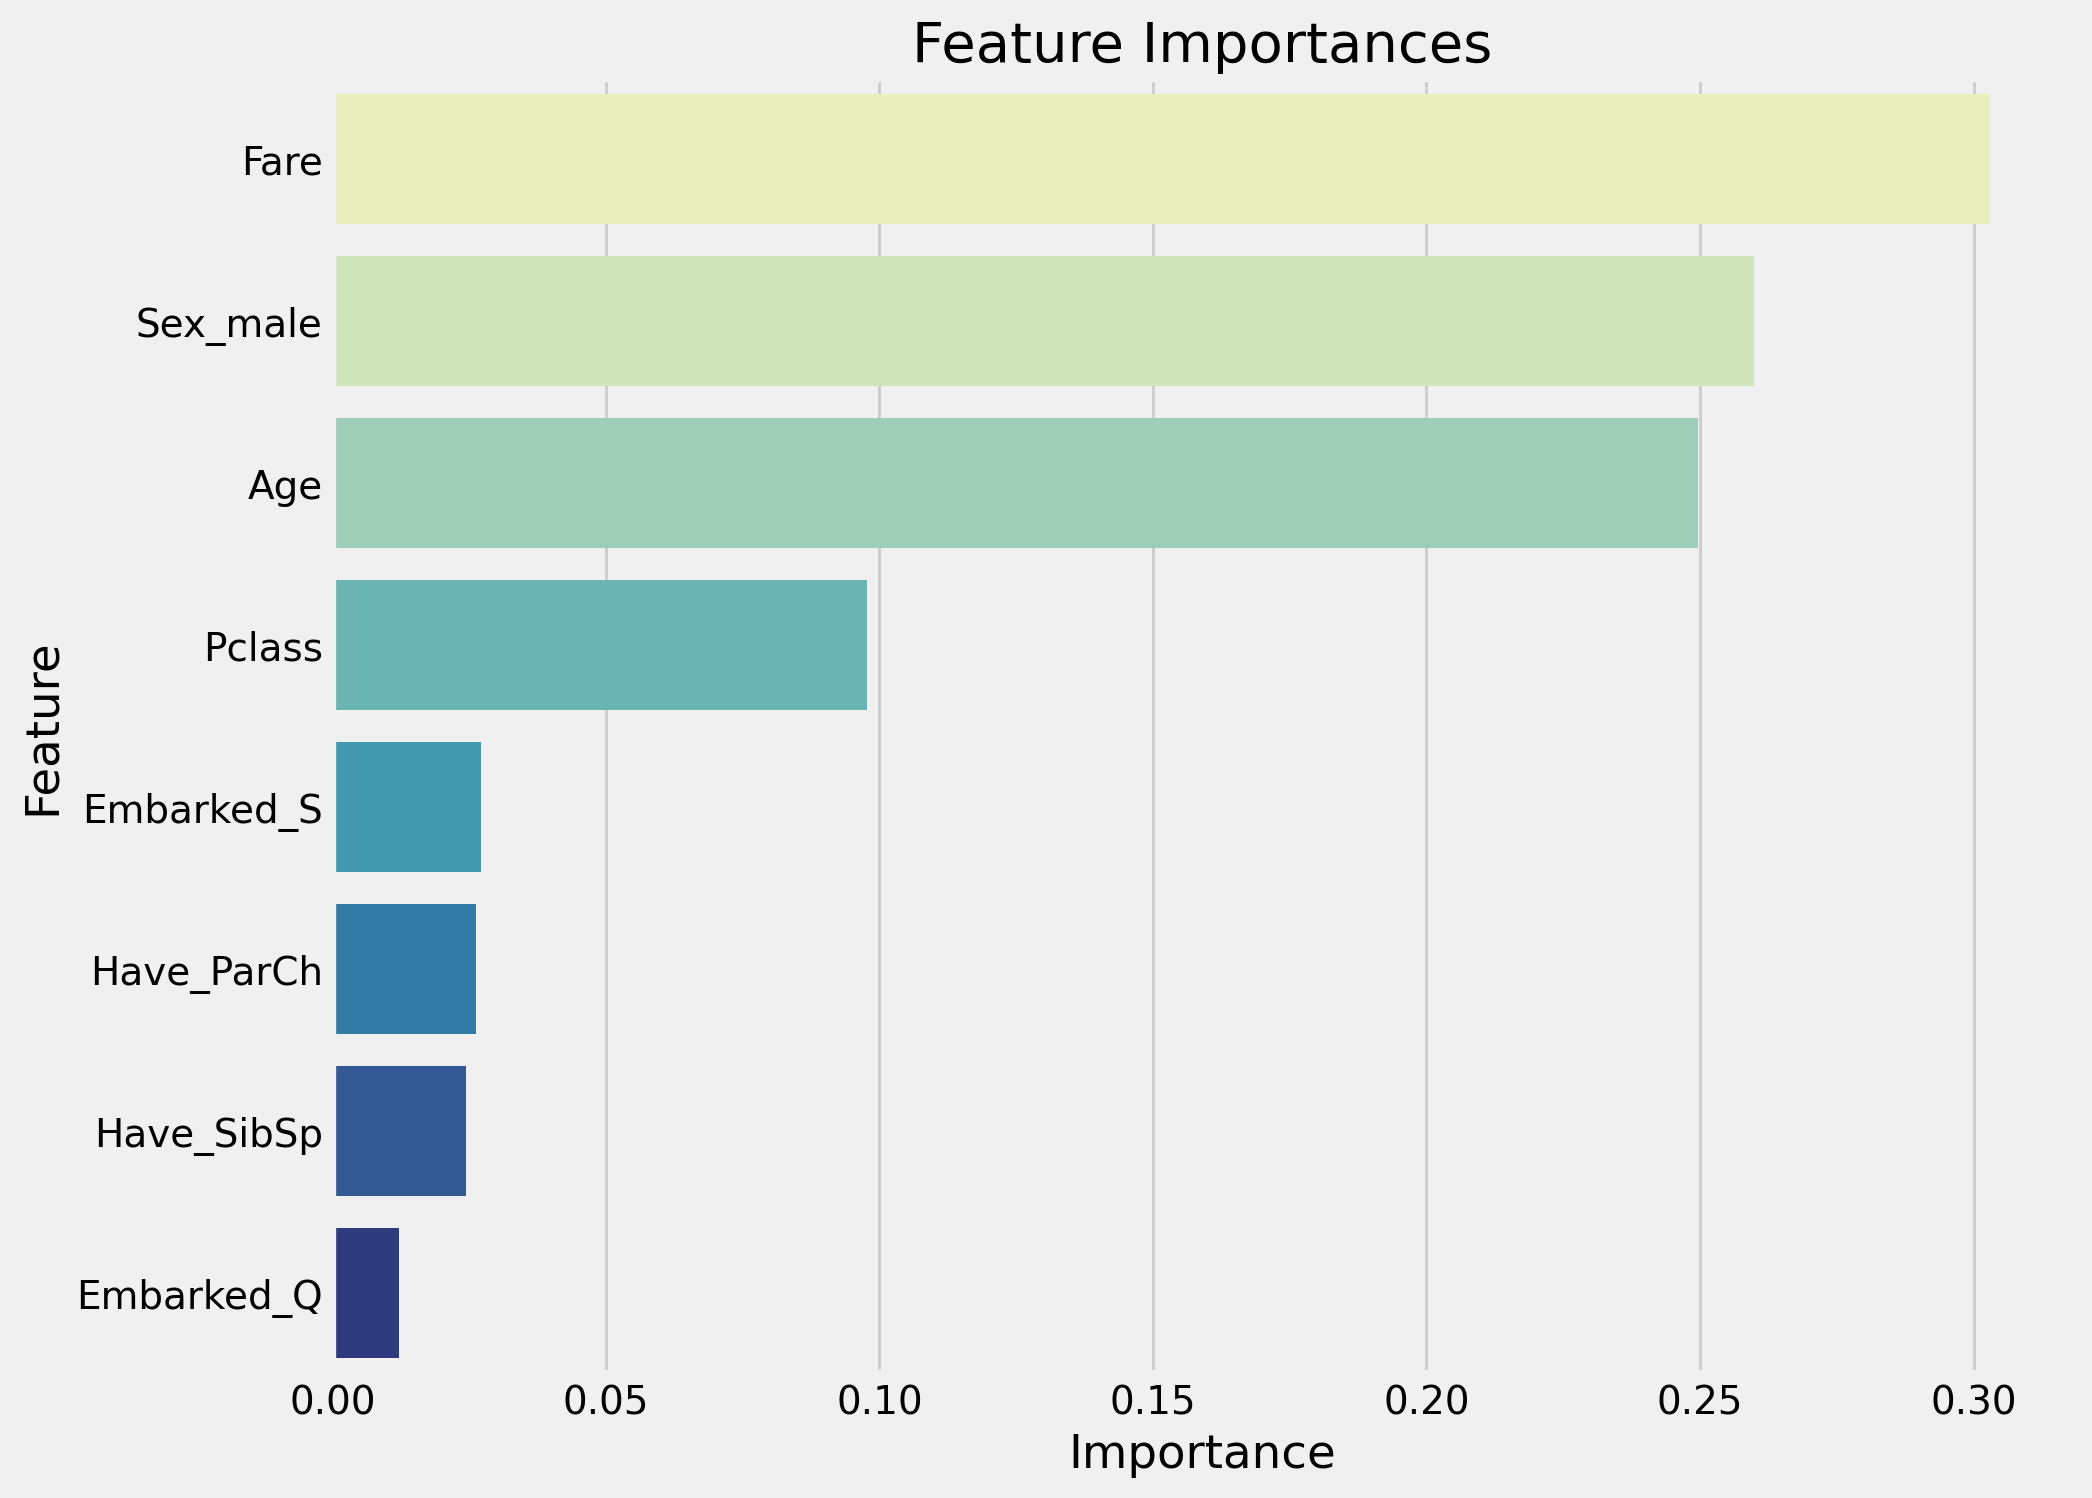

In [ ]:
# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X_train.columns

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순서로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importances')
plt.show()

## 10. 과적합 방지 모델 - L1(Lasso)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# L1 규제(Logistic Regression) 모델 초기화
model = LogisticRegression(penalty='l1', solver='saga', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6729

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       158
           1       0.76      0.29      0.42       108

    accuracy                           0.67       266
   macro avg       0.71      0.61      0.59       266
weighted avg       0.70      0.67      0.63       266


Confusion Matrix:
[[148  10]
 [ 77  31]]


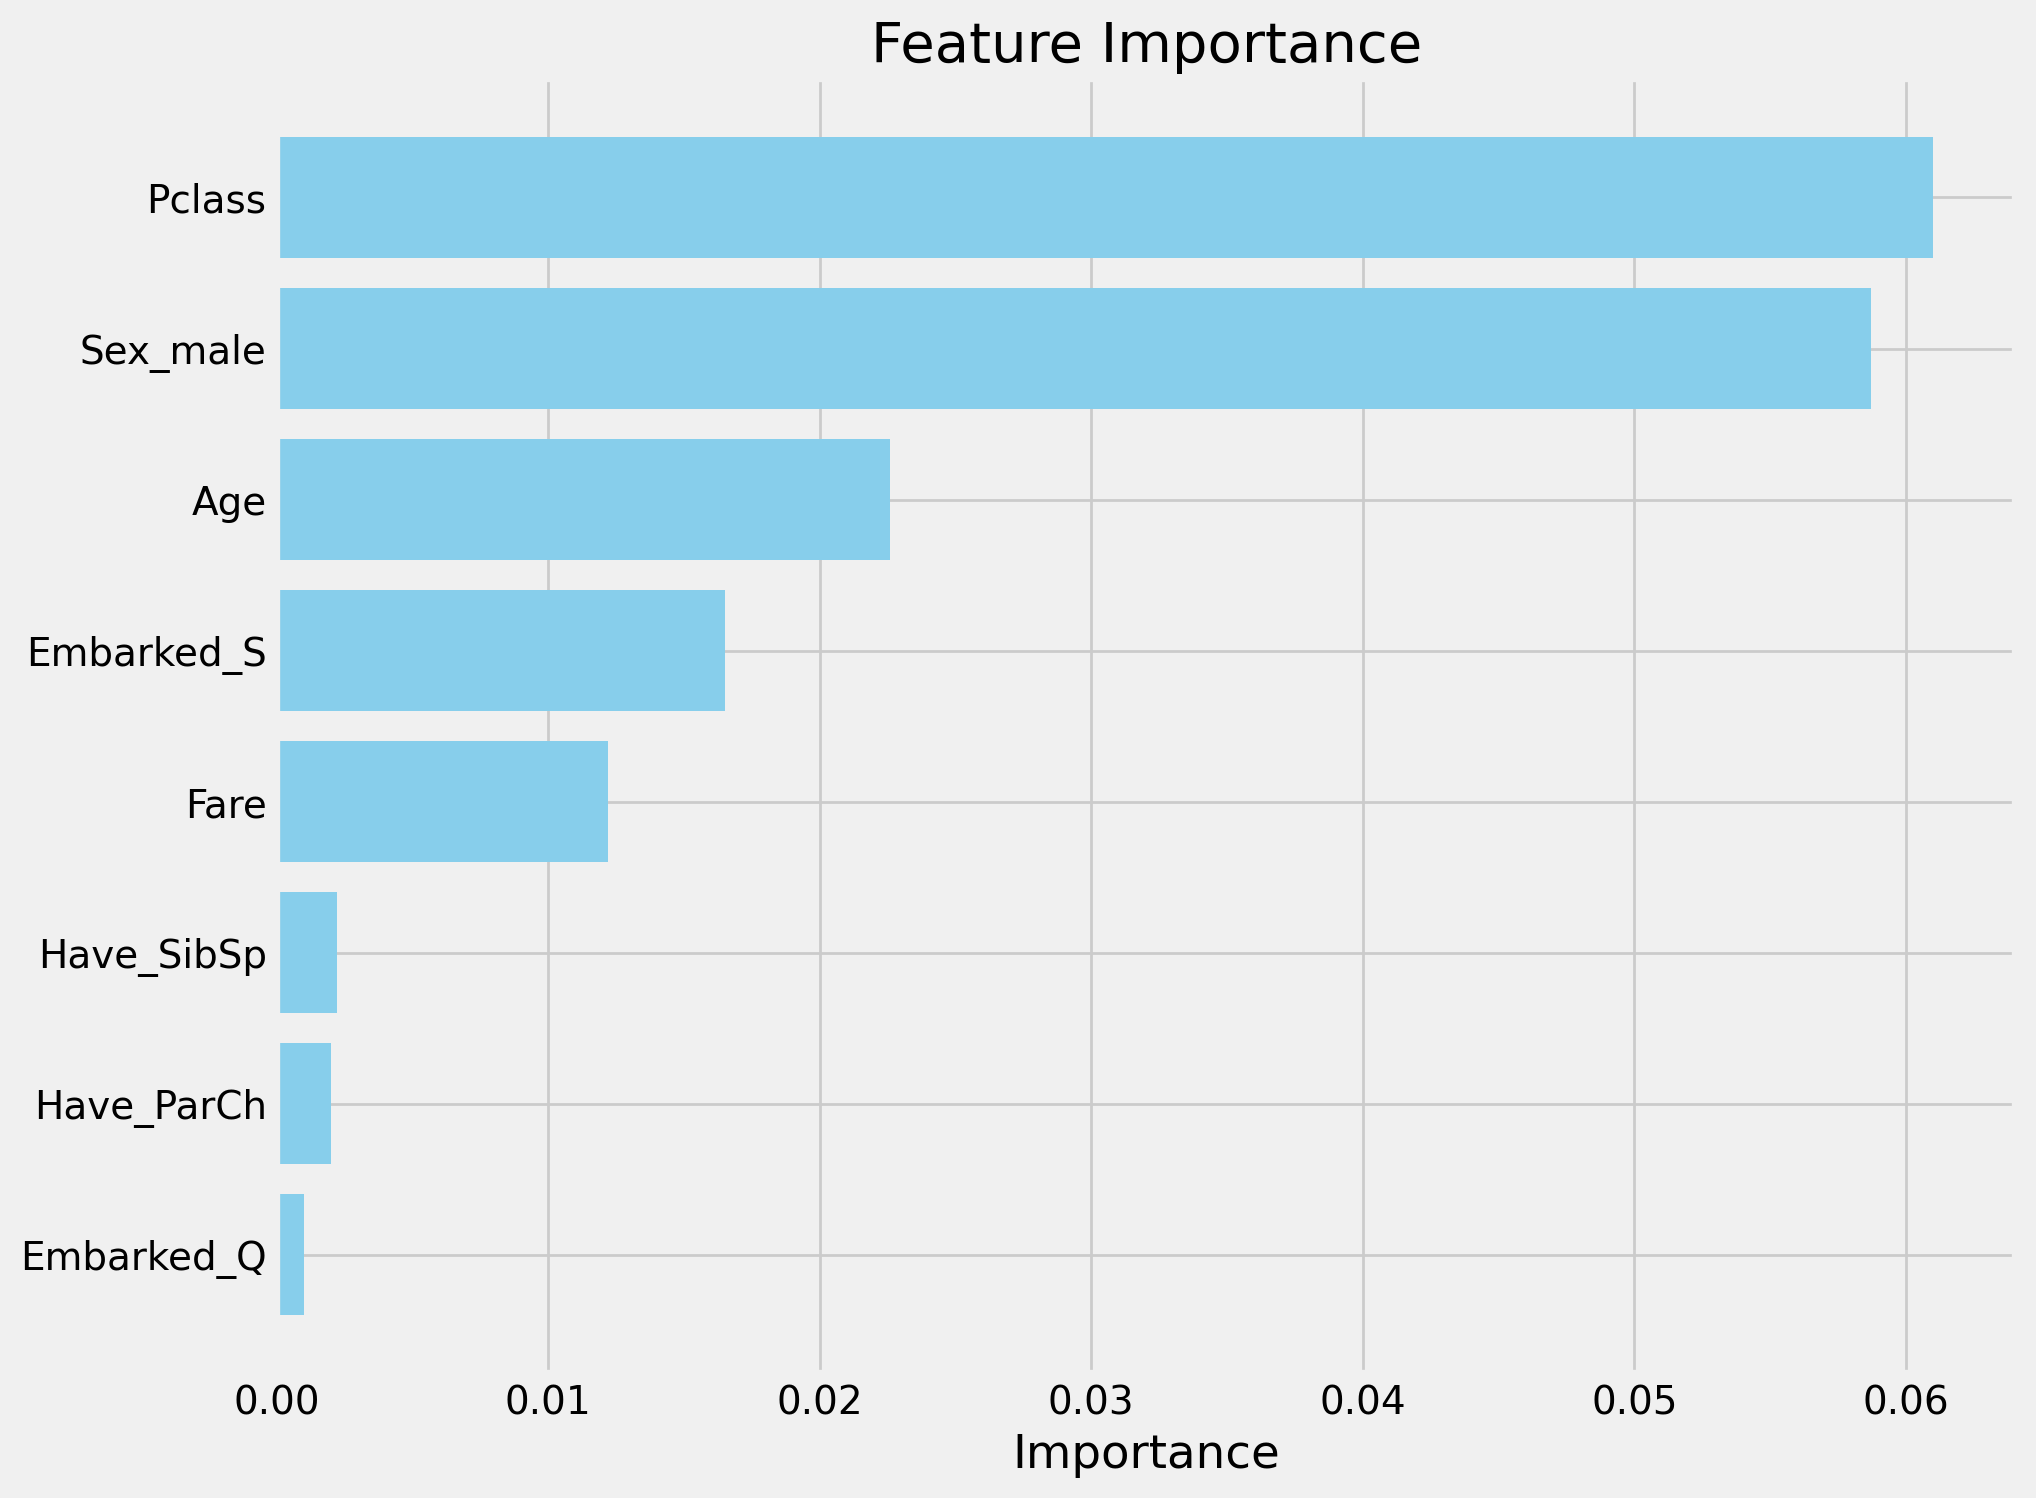

In [ ]:
# 계수 추출
coefficients = model.coef_[0]
feature_names = X_train.columns

# 계수의 절댓값을 중요도로 사용
importance = np.abs(coefficients)

# 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# test 파일

## 6. 피처 선택

In [ ]:
test = ori_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

### 분포 확인

In [ ]:
test.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# 변수 타입
data_types = test.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['Sex', 'Embarked']

양적 변수: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
target_cols = quant_vari
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

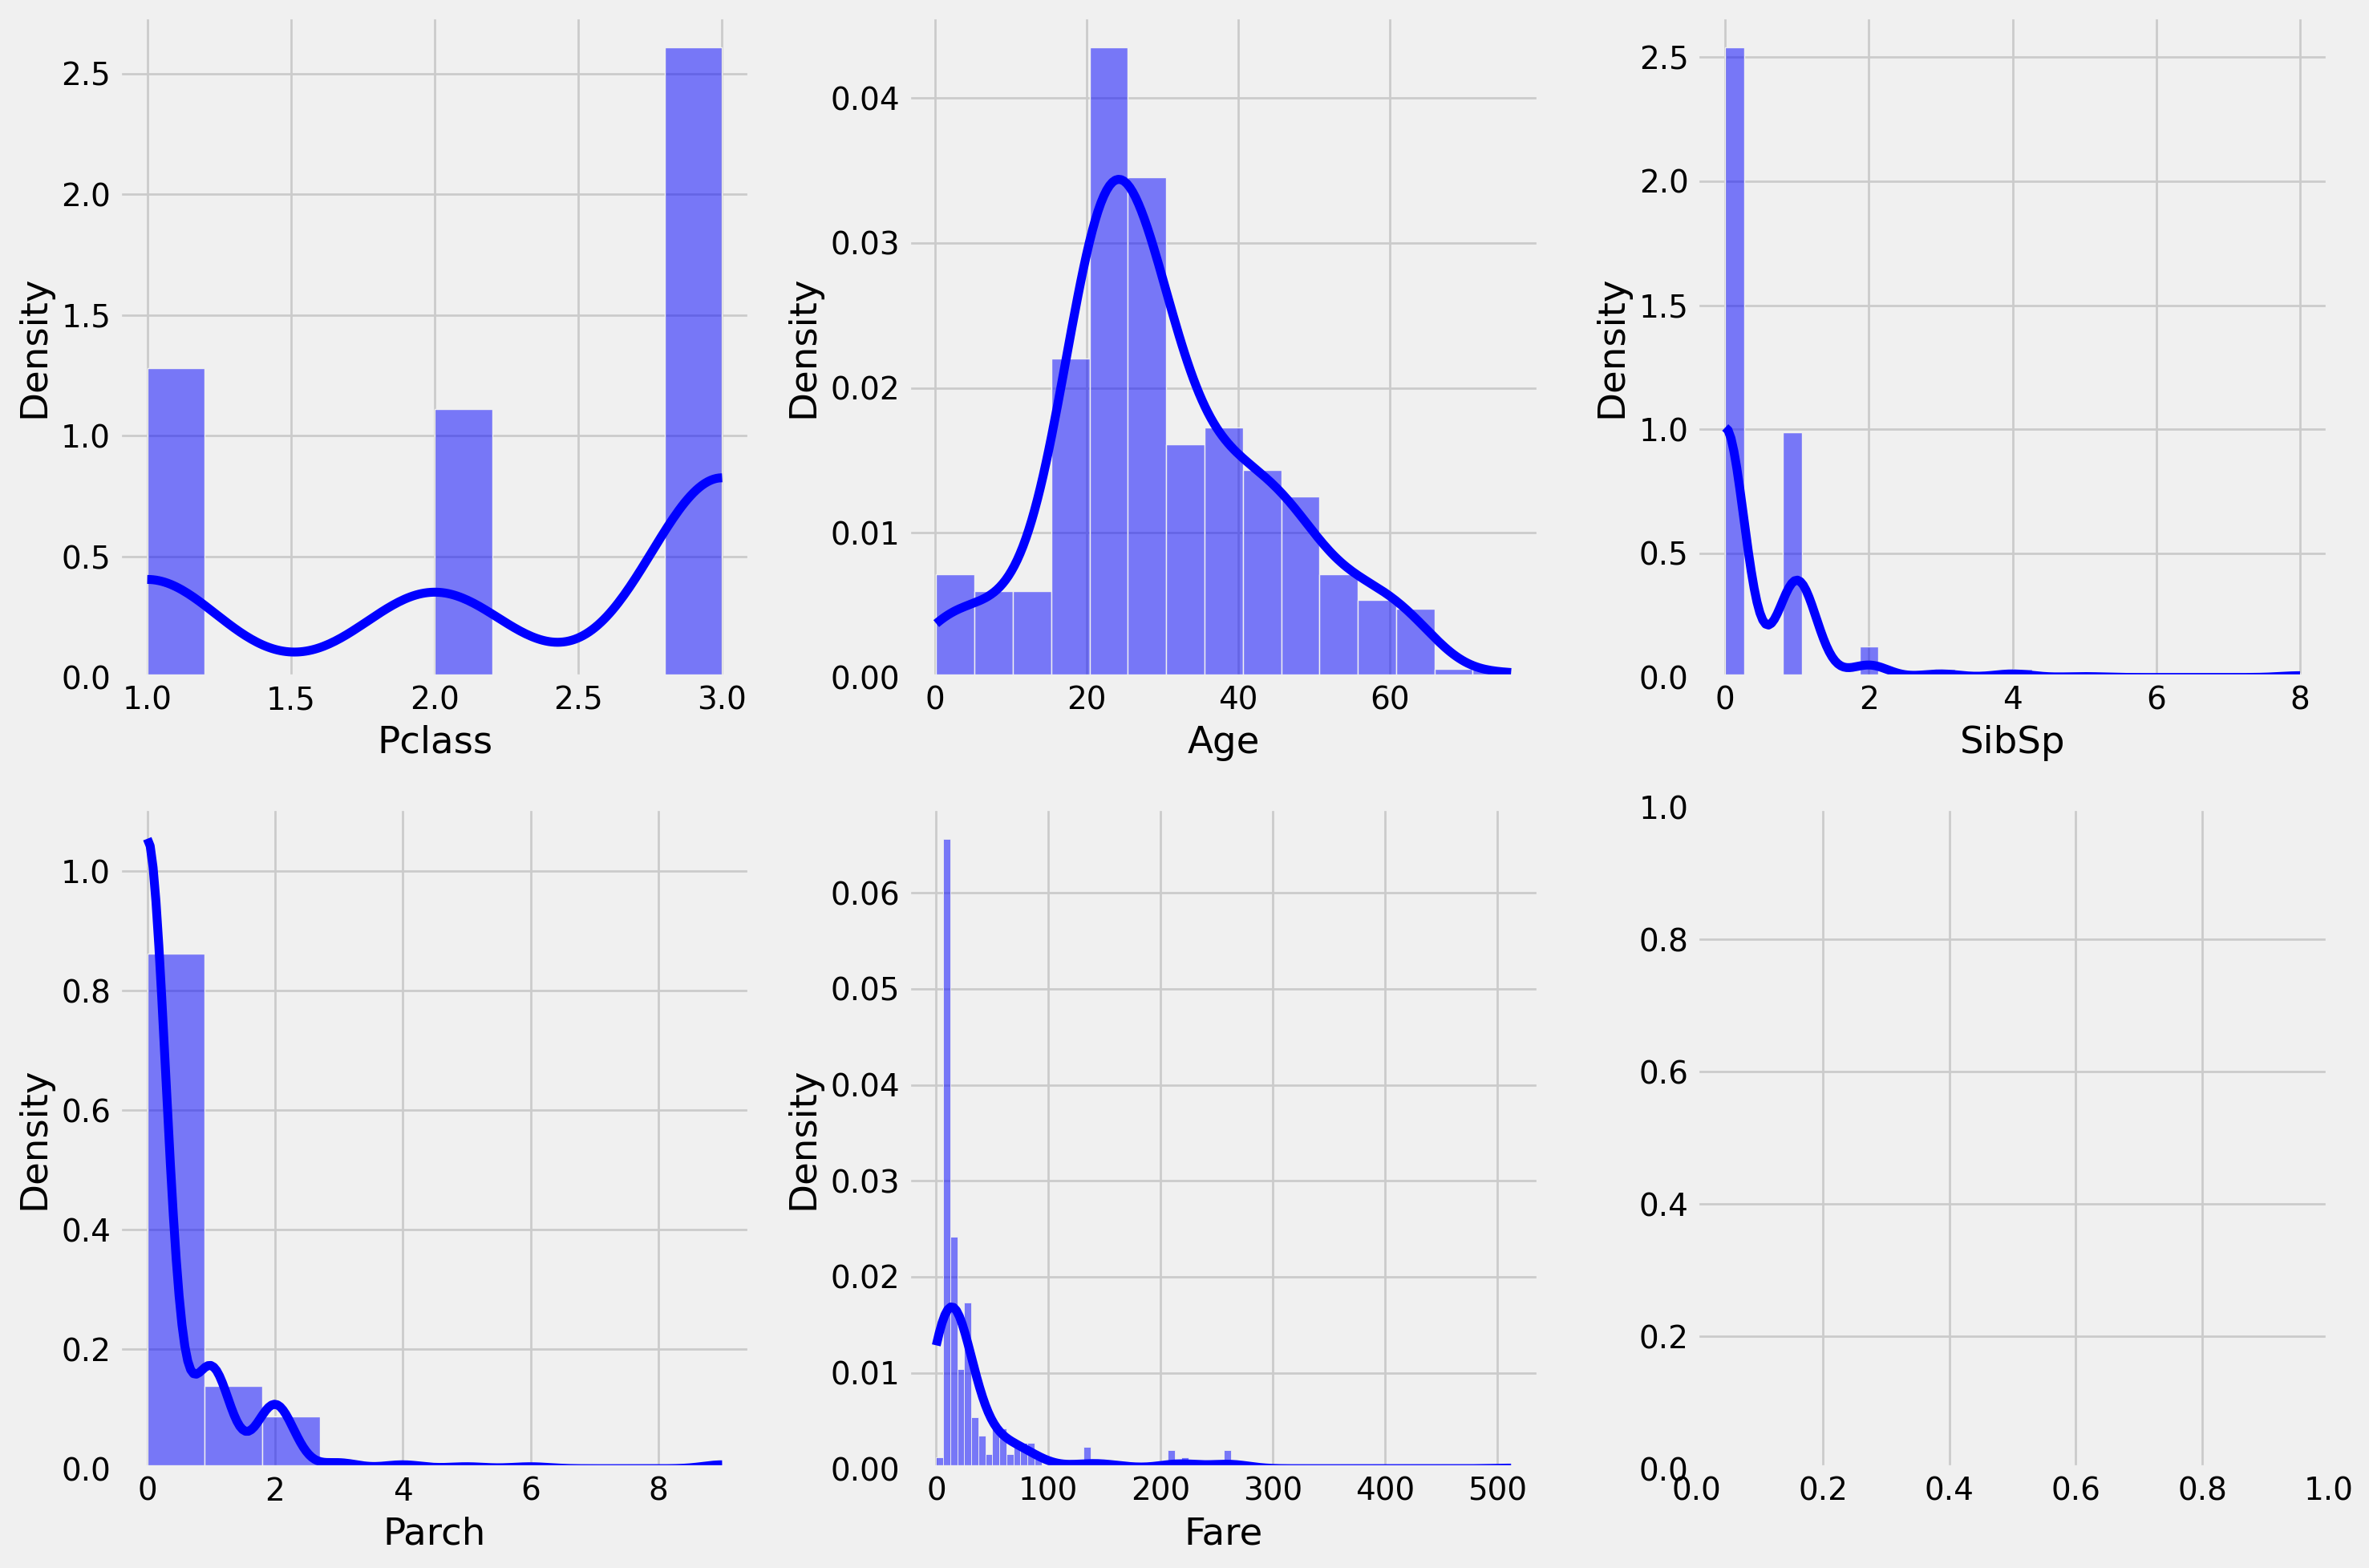

In [ ]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(test[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
for col in qual_vari:
    print(input_train[col].value_counts())
    print()

Sex
male      570
female    314
Name: count, dtype: int64

Embarked
S    642
C    166
Q     76
Name: count, dtype: int64



## 1. 결측치 처리

In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


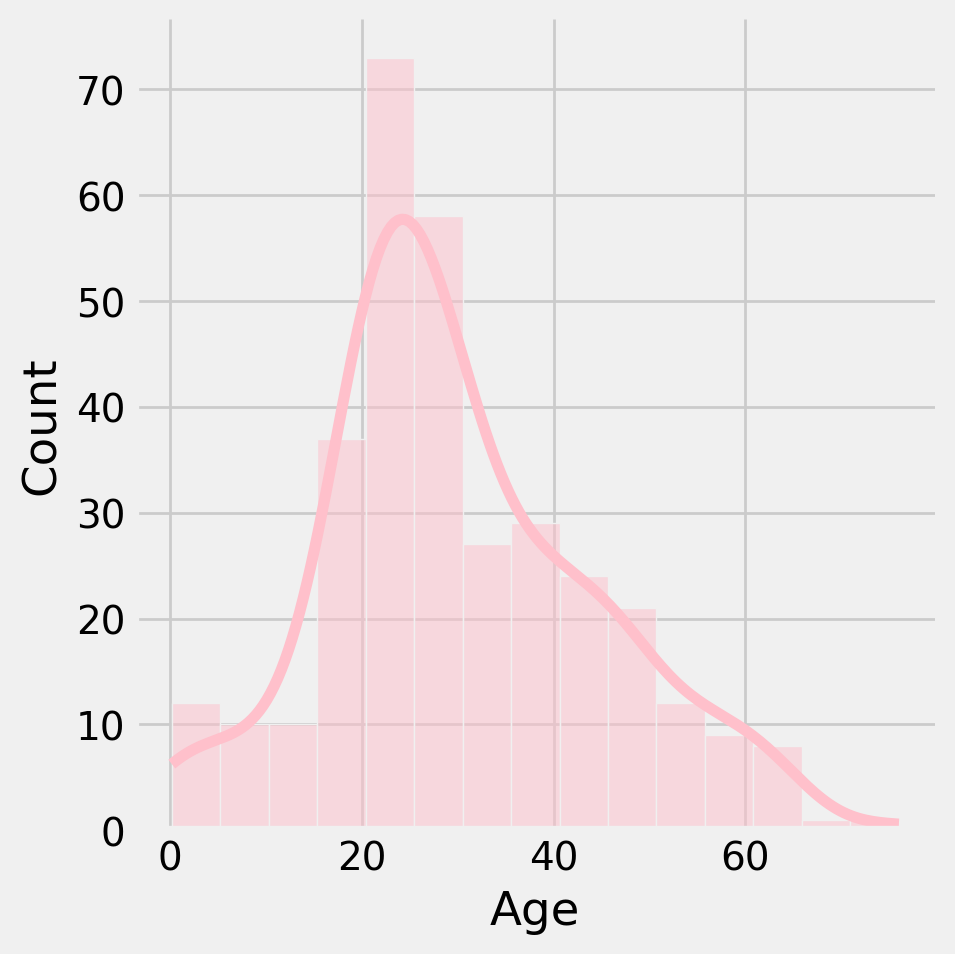

In [ ]:
#Mean or Median?
#데이터 분포를 확인해 결정하기!
sns.displot(test['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

데이터 분포가 정규분포의 모양에서 크게 벗어나 왜곡되거나 쏠리지는 않았습니다.

In [ ]:
print(test['Age'].mean())
print(test['Age'].median())

30.272590361445783
27.0


실제로 거의 비슷하네요. median을 선택하겠습니다.

In [ ]:
test['Age'].fillna(test['Age'].median(), inplace=True)

### Fare

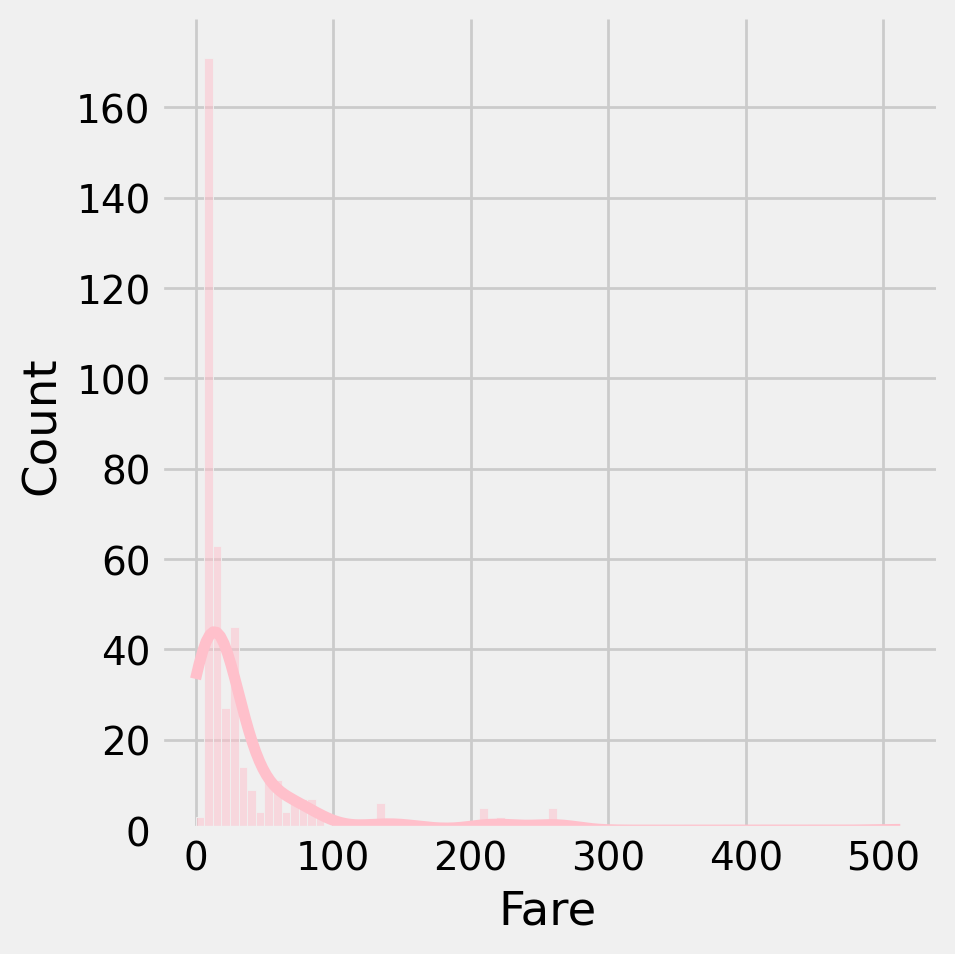

In [ ]:
sns.displot(test['Fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

In [ ]:
print(test['Fare'].mean())
print(test['Fare'].median())

35.627188489208635
14.4542


(임의) 중앙값 선택

In [ ]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

## 5. 이상치 처리

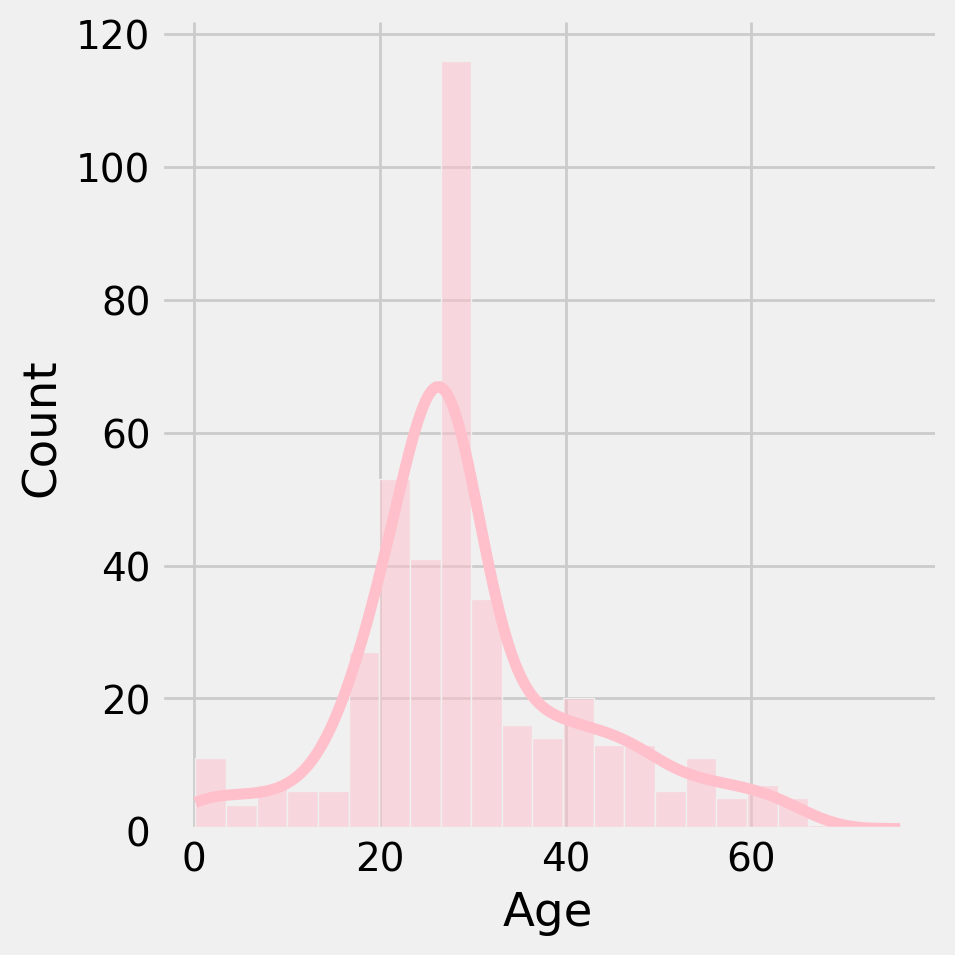

In [ ]:
sns.displot(test['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

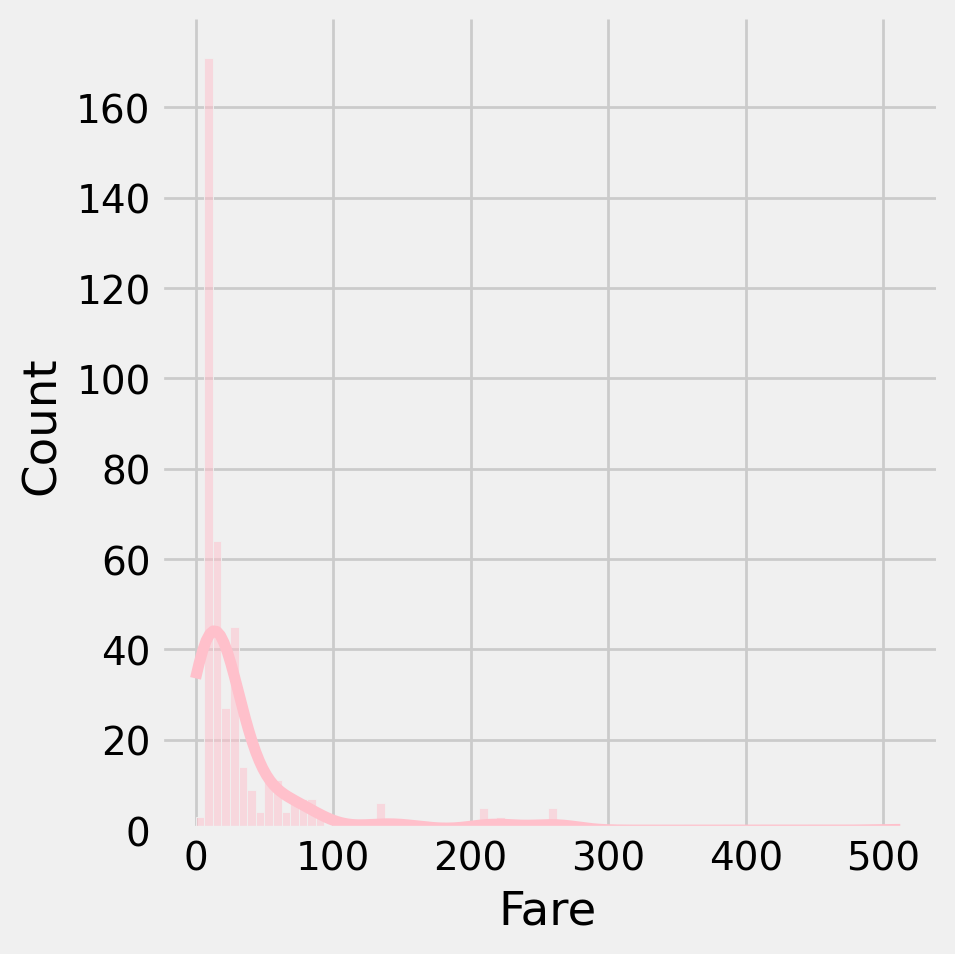

In [ ]:
sns.displot(test['Fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

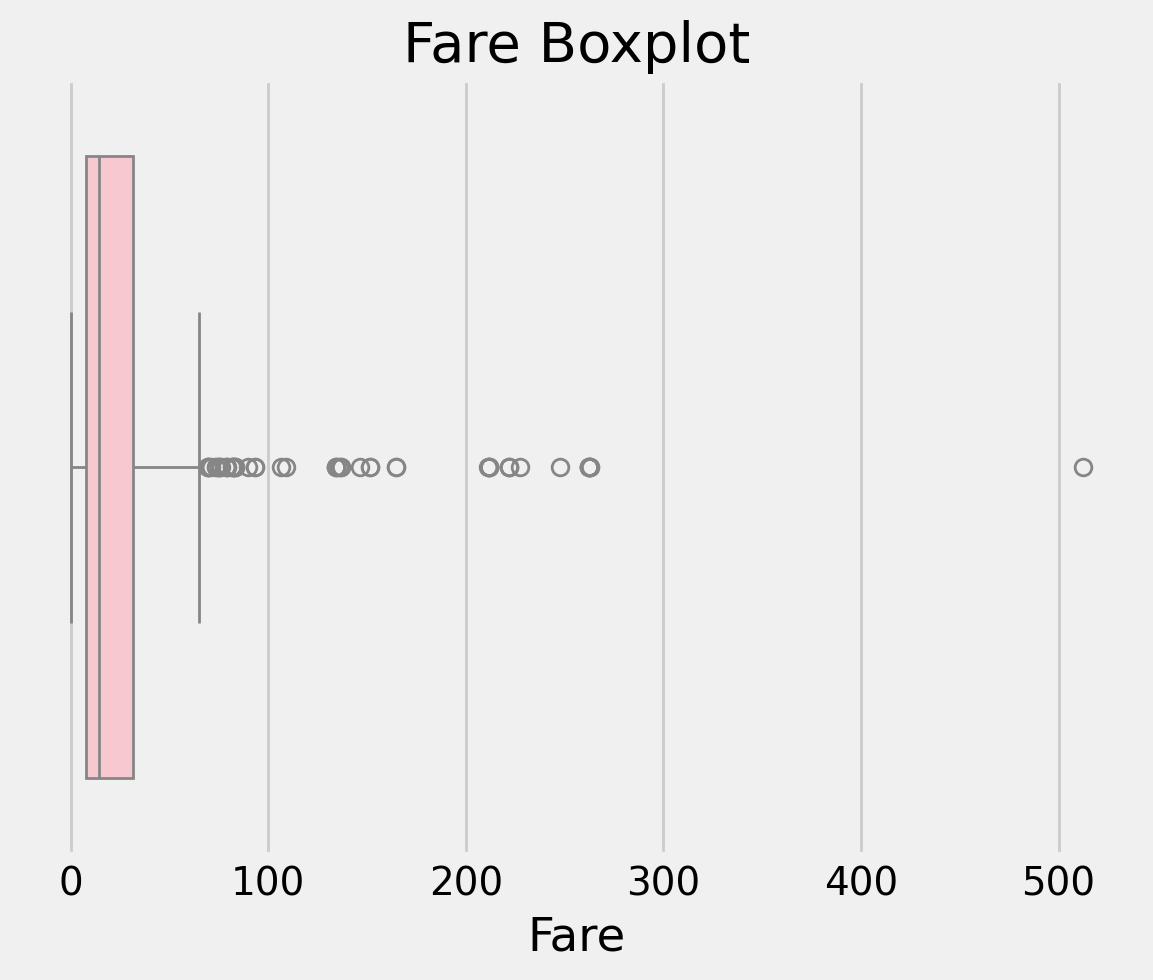

In [ ]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(test, 'Fare')

sns.boxplot(x=test['Fare'], color='pink')
plt.title('Fare Boxplot')
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(test['Age'])
abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = test[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
    Pclass     Sex   Age  SibSp  Parch   Fare Embarked
96       1  female  76.0      1      0  78.85        S


In [ ]:
test = test[abs_z_scores <= age_threshold]

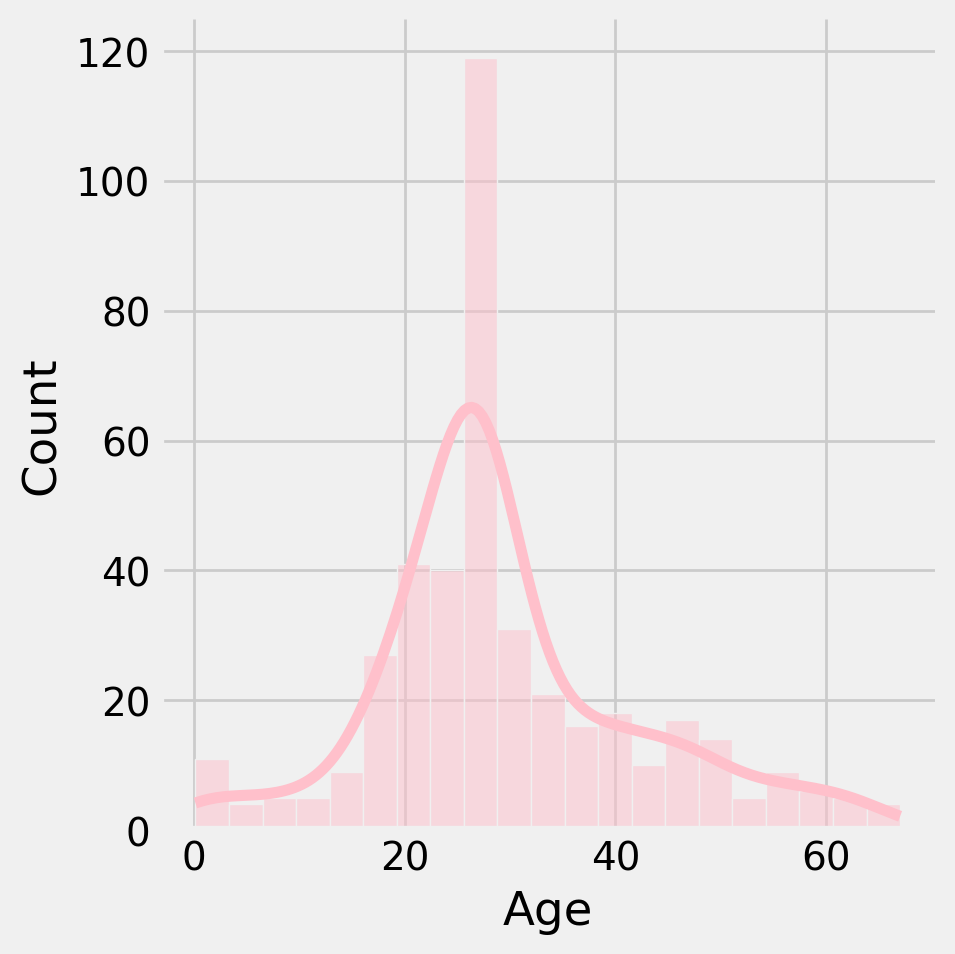

In [ ]:
#이상치 처리 후 모습
sns.displot(test['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

## 2. 인코딩

In [ ]:
# 원-핫 인코딩
test_processed = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)
test_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [ ]:
# SibSp와 Parch 컬럼을 0과 0이 아닌 값으로 인코딩
test_processed['Have_SibSp'] = test_processed['SibSp'].apply(lambda x: False if x == 0 else True)
test_processed['Have_ParCh'] = test_processed['Parch'].apply(lambda x: False if x == 0 else True)

test_processed.drop(columns=['SibSp','Parch'], inplace=True)

# 결과 출력
test_processed.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Have_SibSp,Have_ParCh
0,3,34.5,7.8292,True,True,False,False,False
1,3,47.0,7.0000,False,False,True,True,False
2,2,62.0,9.6875,True,True,False,False,False
3,3,27.0,8.6625,True,False,True,False,False
4,3,22.0,12.2875,False,False,True,True,True


## 3. 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
test_scaled = test_processed.copy()

# 연속형 변수만 스케일링
test_scaled[['Age', 'Fare']] = scaler.fit_transform(test_scaled[['Age', 'Fare']])

## 4. 왜도 처리

In [ ]:
# 변환 방법 리스트
transformations = {
    'log': np.log1p,
    'sqrt': np.sqrt,
    'boxcox': lambda x: stats.boxcox(x + 1)[0]  # boxcox 변환은 0 초과과의 값이어야 하므로 1을 더해줌
}

In [ ]:
def Skewness(df, cols):
    best_transformation = {}

    for column in cols:
        print(f"컬럼 '{column}'의 변환 및 왜도 측정 결과:")
        original_data = df[column].values

        # 왜도 확인
        original_skew = stats.skew(original_data)
        print(f"원본 데이터: 왜도 = {original_skew:.4f}")
        best_skew = original_skew
        best_method = 'original'

        for method, transform in transformations.items():
            try:
                transformed_data = transform(original_data)
                skew = stats.skew(transformed_data)
                print(f"{method} 변환: 왜도 = {skew:.4f}")
                if np.abs(skew) < np.abs(best_skew):
                    best_skew = skew
                    best_method = method
            except ValueError as e:
                print(f"{method} 변환 실패: {e}")

        best_transformation[column] = best_method
        print(f"가장 적절한 변환 방법: {best_method}\n")

    print("각 컬럼의 최적 변환 방법:", best_transformation)

In [ ]:
Skewness(test_scaled, ['Age','Fare'])

컬럼 'Age'의 변환 및 왜도 측정 결과:
원본 데이터: 왜도 = 0.5945
log 변환: 왜도 = 0.1024
sqrt 변환: 왜도 = -0.7750
boxcox 변환: 왜도 = -0.0070
가장 적절한 변환 방법: boxcox

컬럼 'Fare'의 변환 및 왜도 측정 결과:
원본 데이터: 왜도 = 3.6871
log 변환: 왜도 = 3.0897
sqrt 변환: 왜도 = 2.0811
boxcox 변환: 왜도 = 0.7757
가장 적절한 변환 방법: boxcox

각 컬럼의 최적 변환 방법: {'Age': 'boxcox', 'Fare': 'boxcox'}


In [ ]:
# Box-Cox 변환 함수 정의
boxcox_transform = lambda x: stats.boxcox(x + 1)[0]

# 변환을 적용할 데이터 컬럼
test_scaled['Fare'] = boxcox_transform(test_scaled['Fare'])

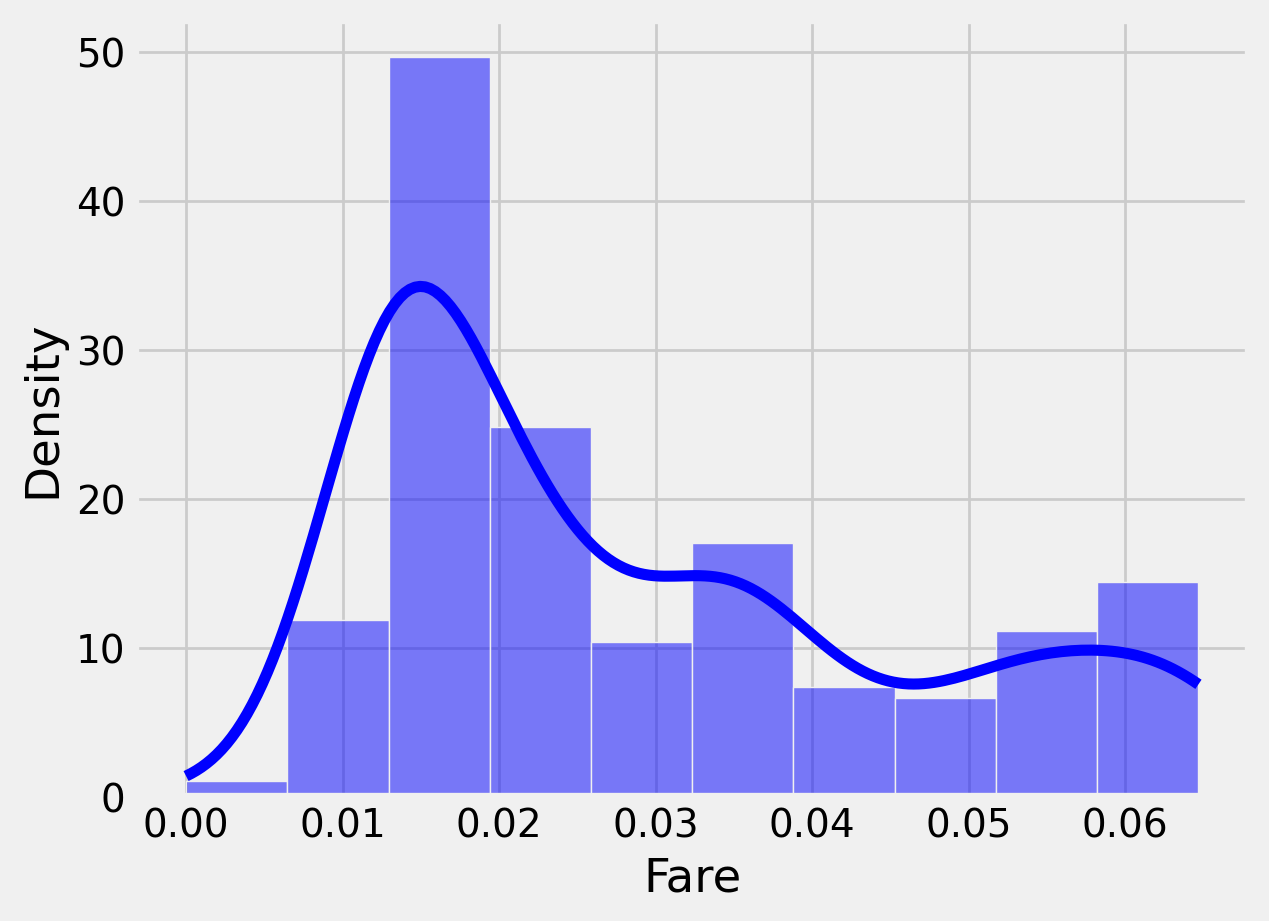

In [ ]:
sns.histplot(test_scaled['Fare'], color='blue', kde=True, label='Negative', stat='density', alpha=0.5)
plt.show()

## 6. 피처 선택 re

### 다중 공선성

In [ ]:
vif_test = test_scaled.copy()

In [ ]:
vif_test.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Have_SibSp,Have_ParCh
0,3,0.513691,0.013519,True,True,False,False,False
1,3,0.700733,0.012241,False,False,True,True,False
2,2,0.925183,0.016263,True,True,False,False,False
3,3,0.401466,0.014770,True,False,True,False,False
4,3,0.326650,0.019843,False,False,True,True,True


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = vif_test
X = sm.add_constant(X)

X = X.astype(float)  # dummy 결과로 boolean 값을 가짐 -> float으로 변환

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable        VIF
0       const  73.753487
1      Pclass   3.300309
2         Age   1.327828
3        Fare   3.811274
4    Sex_male   1.125343
5  Embarked_Q   1.578737
6  Embarked_S   1.422599
7  Have_SibSp   1.419046
8  Have_ParCh   1.477976


다중공선성은 띠지 않는 것으로 결과가 나왔습니다. (보통 5 이상을 유의하게 판단)

# 모델 적용

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_scaled = test_scaled.reindex(columns=X_train.columns, fill_value=0)

# 2. 모델을 사용하여 예측
y_pred_test = model.predict(test_scaled)

# 3. 예측 결과를 test 데이터프레임에 추가
test_scaled['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test_scaled[['Survived']])

     Survived
0           0
1           1
2           0
3           1
4           1
..        ...
413         1
414         1
415         1
416         1
417         1

[417 rows x 1 columns]


In [ ]:
test_scaled['Survived'].value_counts()

,count
Survived,
1,304
0,113


# 모델 저장

In [ ]:
from datetime import datetime

feature_importances = model.feature_importances_
features = test_scaled.columns

feature_importance_list = list(zip(features, feature_importances))

args.results.append(
    {
        'model': 'forest11',
        'score_tr': '',
        'score_te': '',
        'auc_te': accuracy,
        'len_features': test_scaled.shape[1],
        'feature_importances': feature_importance_list,  # 리스트 형태로 저장
        'create_dt': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
)

args.results

[{'model': 'forest11',
  'score_tr': '',
  'score_te': '',
  'auc_te': 0.6729323308270677,
  'len_features': 9,
  'feature_importances': [('Pclass', 0.09766230984010736),
   ('Age', 0.2496395355999111),
   ('Fare', 0.30293985405511664),
   ('Sex_male', 0.2598231228435754),
   ('Embarked_Q', 0.012126812483107772),
   ('Embarked_S', 0.027199746350704476),
   ('Have_SibSp', 0.02441644203378934),
   ('Have_ParCh', 0.026192176793687995)],
  'create_dt': '2024-09-07 14:33:32'}]

In [ ]:
# 결과 출력
for result in args.results:
    print(f"Model: {result['model']}, AUC: {result['auc_te']}, Date: {result['create_dt']}")

# 특정 모델의 성능 분석
model_results = [r for r in args.results if r['model'] == 'forest11']

Model: forest11, AUC: 0.6729323308270677, Date: 2024-09-07 14:33:32


In [ ]:
model_result_df = pd.DataFrame(model_results)

In [ ]:
# AUC 값을 기준으로 내림차순 정렬
sorted_results = model_result_df.sort_values(by='auc_te', ascending=False)

In [ ]:
# 가장 높은 AUC를 가진 모델의 예측값 선택
best_model = sorted_results.iloc[0]
best_model_predictions = best_model['feature_importances']

In [ ]:
# PassengerId와 Survived를 함께 결합합니다
submission = pd.concat([ori_test[['PassengerId']], test_scaled[['Survived']]], axis=1)

In [ ]:
submission.isnull().sum()

,0
PassengerId,0
Survived,1


In [ ]:
import os
#휘발성이므로 런타임 해제될 시 확인 불가. 따라서 json/csv로 저장하는 것이 권장

today_results = pd.DataFrame(args.results)

file_path = 'model_results.csv'

if os.path.exists(file_path):
    existing_results = pd.read_csv(file_path)
    combined_results = pd.concat([existing_results, today_results], ignore_index=True)
else:
    combined_results = today_results

combined_results.to_csv(file_path, index=False)

print(f"Results have been saved to {file_path}")

Results have been saved to model_results.csv


# Submission

In [ ]:
submission['Survived'].value_counts()

,count
Survived,
1.0,304
0.0,113


In [ ]:
ori_train['Survived'].value_counts()

,count
Survived,
0,549
1,342
